# The data and project overview

NYC data set consists of 4 separate data sets with data for all public transit bus lines in the NYC area.

The dataset consists of nearly 4 million rows of data. After data reprocessing and feature engineering, the data consists of 366 features. 

The Logistic Regression, K Nearest Neighbor, Support Vector, Decision Tree, Random Forest, and Gradient Boosting models were all applied to the data, along with applying SelectKBest,  GridSearchCV, and PCA.

#**Build Environment then load data**

In [ ]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt

In [ ]:
# Change directory depending on where Dates.csv is located locally.
cd MTA

C:\Users\ortiz alejandro\Google Drive\Thinkful Course Work\Final Capstone\MTA


# Logistic Regression Model

In [ ]:
# Load dataset that has been cleaned and reprocessed in Data cleaning notebook
Dates = pd.read_csv("Dates.csv", dtype='int8')

In [ ]:
# Verifying Dataset loaded correctly with similar shape and file size
Dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693647 entries, 0 to 1693646
Columns: 367 entries, Unnamed: 0 to X
dtypes: int8(367)
memory usage: 592.8 MB


#**Define Features and target**

In [ ]:
# X will consist of all 366 feature, and our target ius
# whether they are late or not. As a reminder, "lateness"
# was defined as arriving later than 15 minutes after the expected time.
# standard scaler will be used on our features, and then the train/test split
# is created.
X = Dates.drop(['Late_yes'],axis=1)
y = Dates["Late_yes"]

X_std = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)

#**Logistic Regression Model**

Baseline Testing

In [ ]:
# Before going any further, I test the Logistic Regression Model
# using all features and no hyperparamet tuning to develop a baseline for
# future reference
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10, C=1, n_jobs=6)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
# There is severe class imbalancing which will need to be addressed
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[453104    479]
 [ 54121    391]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    453583
           1       0.45      0.01      0.01     54512

    accuracy                           0.89    508095
   macro avg       0.67      0.50      0.48    508095
weighted avg       0.85      0.89      0.84    508095



In [ ]:
# The test and training scores are great, however we already know the classes are not balanced,
# so the "weighting" is also likely leaning towards one side over the other
print('Score on training data: ', train_score)
print('Score on test data: ', lr_score)

Score on training data:  0.8922864623399058
Score on test data:  0.8925397809464766


#**Class Balancing**

Under Sampling

In [ ]:
# First we will address the class imbalance,
# then address the problem.
print(X.shape)
print(y.shape)

(1693647, 366)
(1693647,)


Text(0, 0.5, 'Frequency')

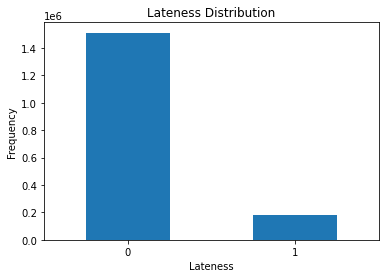

In [ ]:
count_classes = pd.value_counts(Dates['Late_yes'], sort=True)
count_classes.plot(kind ='bar', rot=0)
plt.title('Lateness Distribution')
plt.xticks(range(2))
plt.xlabel('Lateness')
plt.ylabel('Frequency')

In [ ]:
# further confirmation the balance of
# 0 outweighs the 1
print(Dates[Dates['Late_yes']==0].shape)
print(Dates[Dates['Late_yes']==1].shape)

(1511606, 367)
(182041, 367)


In [ ]:
# Loading library, in this instance I use NearMiss
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,y)

In [ ]:
# The classes are now equally balanced
X_res.shape,y_res.shape

((364082, 366), (364082,))

#**Logistic Regression Model**

Model using balanced class dataset 

In [ ]:
# With the classes now balanced, let's see how the model performs.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [ ]:
# Once again testing with same parameters as before
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10, C=1, n_jobs=6)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23043 31476]
 [24595 30111]]
              precision    recall  f1-score   support

           0       0.48      0.42      0.45     54519
           1       0.49      0.55      0.52     54706

    accuracy                           0.49    109225
   macro avg       0.49      0.49      0.48    109225
weighted avg       0.49      0.49      0.48    109225



In [ ]:
# The classes are now very nicely balanced, but now the model
# on both training and test data is poor.
print('Score on training data: ', train_score)
print('Score on test data: ', lr_score)

Score on training data:  0.48664937592453805
Score on test data:  0.48664682993820096


#**Apply SelectKBest**

In progress

In [ ]:
# We will now apply SelectKBest to retain the most significant features
# from the 366 available
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
X_res.shape

(364082, 366)

In [ ]:
X_clf = SelectKBest(score_func=f_classif, k=300).fit_transform(X_res, y_res)

In [ ]:
#Further testing was done testing with a K value ranging from 5-366,
# and ultimately the K value of 300 provided the best results in
# the LRM testing in the next step
X_clf.shape

(364082, 300)

#**Logistic Regression Model**

Model with balanced and SelectKBest applied.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10, C=1, n_jobs=6)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25730 28789]
 [25981 28725]]
              precision    recall  f1-score   support

           0       0.50      0.47      0.48     54519
           1       0.50      0.53      0.51     54706

    accuracy                           0.50    109225
   macro avg       0.50      0.50      0.50    109225
weighted avg       0.50      0.50      0.50    109225



In [ ]:
# the classes are still nicely balanced but the test/training accuracy only slightly went up.
print('Score on training data: ', train_score)
print('Score on test data: ', lr_score)

Score on training data:  0.5007710206115586
Score on test data:  0.4985580224307622


#**GridsearchCV**

In [ ]:
# Now I test for optimal hyperparameters in the LRM
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
         'penalty' : ['l1','l2'], 
         'solver' : ['sag', 'saga', 'lbfgs']
         }
clf = GridSearchCV(LogisticRegression(max_iter=100, random_state=1, n_jobs=6), param)

In [ ]:
best_model = clf.fit(X_train,y_train)

In [ ]:
# The optimal hyperparameters have been identified
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best Max Iteration:', best_model.best_estimator_.get_params()['max_iter'])

Best Penalty: l2
Best C: 10
Best Solver: sag
Best Max Iteration: 100


Best Hyperparameters:

Best Penalty: l2
Best C: 10
Best Solver: sag
Max_iter: 100

#**Logistic Regression Model**

Model with best Hyperparameters

In [ ]:
# Ready to test with optimal hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

In [ ]:
lr = LogisticRegression(solver='sag', penalty='l2', max_iter=100, random_state=1, C=10, n_jobs=-1)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36017 18502]
 [19667 35039]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65     54519
           1       0.65      0.64      0.65     54706

    accuracy                           0.65    109225
   macro avg       0.65      0.65      0.65    109225
weighted avg       0.65      0.65      0.65    109225



In [ ]:
# The training and test scores went up significantly which is good.
print('Score on training data: ', train_score)
print('Score on test data: ', lr_score)

Score on training data:  0.6525541774406824
Score on test data:  0.6505470359349965


#**PCA**

In [ ]:
# Performing dimensionality reduction to maintain model
# performance with reducing feature need. Once again
# only optimal component number is shown.
pca = PCA(n_components=250)
X_pca = pca.fit_transform(X_clf)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=1)

**Best performing LRM with PCA**

In [ ]:
lr = LogisticRegression(solver='sag', penalty='l2', max_iter=100, random_state=1, C=10, n_jobs=-1)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36490 18029]
 [20293 34413]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66     54519
           1       0.66      0.63      0.64     54706

    accuracy                           0.65    109225
   macro avg       0.65      0.65      0.65    109225
weighted avg       0.65      0.65      0.65    109225



In [ ]:
print('Score on training data: ', train_score)
print('Score on test data: ', lr_score)

Score on training data:  0.6503882569440902
Score on test data:  0.6491462577248799


 **Final Logistic Regression model shows a test accuracy of 64.9%**

# K Nearest Neighbors Model

In [ ]:
# Redefining X and Y to start testing KNN
X = Dates.drop(['Late_yes'],axis=1)
y = Dates["Late_yes"]

X_std = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)

#**KNN Model**

Baseline Testing

In [ ]:
#KNN Model testing using all features and 
# no hyperparameter tuning to develop a baseline for
# future reference
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
knn_score = classifier.score(X_test, y_test)
knn_train_score = classifier.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[438343  15240]
 [ 44564   9948]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    453583
           1       0.39      0.18      0.25     54512

    accuracy                           0.88    508095
   macro avg       0.65      0.57      0.59    508095
weighted avg       0.85      0.88      0.86    508095



In [ ]:
# We see some class imbalancing still and very accurate test/training results
print('Score on training data: ', knn_train_score)
print('Score on test data: ', knn_score)

Score on training data:  0.9101895150950781
Score on test data:  0.8822976018264301


#**KNN Model**

Model using balanced class dataset 

In [ ]:
# Class imbalancing is reused here and we test for training/test accuracy
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
knn_score = classifier.score(X_test, y_test)
knn_train_score = classifier.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35576 18943]
 [25866 28840]]
              precision    recall  f1-score   support

           0       0.58      0.65      0.61     54519
           1       0.60      0.53      0.56     54706

    accuracy                           0.59    109225
   macro avg       0.59      0.59      0.59    109225
weighted avg       0.59      0.59      0.59    109225



In [ ]:
# the training accuracy is good and test accuracy is
# improving, more tuning can still happen however
print('Score on training data: ', knn_train_score)
print('Score on test data: ', knn_score)

Score on training data:  0.7120110493335479
Score on test data:  0.589755092698558


#**Apply SelectKBest**

In progress

In [ ]:
X_res.shape

(364082, 366)

In [ ]:
X_clf = SelectKBest(score_func=f_classif, k=150).fit_transform(X_res, y_res)

In [ ]:
# This step is not shown, however each model will 
# require specific SelectKBest tuning, so in this
# instance, K = 150 was optimal
X_clf.shape

(364082, 150)

#**KNN Model**

Model with balanced and SelectKBest applied.

In [ ]:
# Once again testing with optimal features selected
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
knn_score = classifier.score(X_test, y_test)
knn_train_score = classifier.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35577 18942]
 [18093 36613]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.66     54519
           1       0.66      0.67      0.66     54706

    accuracy                           0.66    109225
   macro avg       0.66      0.66      0.66    109225
weighted avg       0.66      0.66      0.66    109225



In [ ]:
# The test score is slighlty improving.
print('Score on training data: ', knn_train_score)
print('Score on test data: ', knn_score)

Score on training data:  0.7132156464213265
Score on test data:  0.6609292744335088


#**GridsearchCV**

In [ ]:
# Testing hyperparamters for KNN
time_start = time.time()

param = {'n_neighbors': [5, 75, 150,250], 
         'weights': ['uniform','distance'], 
         'algorithm': ['ball_tree','kd_tree']}
clf = GridSearchCV(KNeighborsClassifier(), param, n_jobs=-1)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 0.0 seconds


In [ ]:
best_model = clf.fit(X_train,y_train)

In [ ]:
# Optimal hyperparameters have been selected
print('Best N_Neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Weights:', best_model.best_estimator_.get_params()['weights'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])


Best N_Neighbors: 75
Best Weights: uniform
Best algorithm: ball_tree


Best Hyperparameters:


#**KNN Model**

Model with best features

In [ ]:
classifier = KNeighborsClassifier(n_neighbors= 75, weights='uniform', algorithm='ball_tree')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
knn_score = classifier.score(X_test, y_test)
knn_train_score = classifier.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37315 17204]
 [16848 37858]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     54519
           1       0.69      0.69      0.69     54706

    accuracy                           0.69    109225
   macro avg       0.69      0.69      0.69    109225
weighted avg       0.69      0.69      0.69    109225



In [ ]:
# Once again the test accuracy improved, now moving onto PCA.
print('Score on training data: ', knn_train_score)
print('Score on test data: ', knn_score)

Score on training data:  0.6981248307874612
Score on test data:  0.6882398718242161


#**PCA**

In [ ]:
# PCA testing not shown, but component number of 75 proved
# to be optimal in retaining value of data
pca = PCA(n_components=75)
X_pca = pca.fit_transform(X_clf)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=1)

**Best performing KNN model with PCA**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors= 75, weights='uniform', algorithm='ball_tree')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
knn_score = classifier.score(X_test, y_test)
knn_train_score = classifier.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38258 16261]
 [17798 36908]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     54519
           1       0.69      0.67      0.68     54706

    accuracy                           0.69    109225
   macro avg       0.69      0.69      0.69    109225
weighted avg       0.69      0.69      0.69    109225



In [ ]:
# The test accuracy once again improved, the result is fairly good
# for the KNN model accuracy.
print('Score on training data: ', knn_train_score)
print('Score on test data: ', knn_score)

Score on training data:  0.6982543151649748
Score on test data:  0.68817578393225


**Final SVM model shows a test accuracy of 68.8%**

# Support Vector Model 

In [ ]:
# Redefining X and Y for SVM baseline testing
X = Dates.drop(['Late_yes'],axis=1)
y = Dates["Late_yes"]

X_std = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)

#**Support Vector Model**

Baseline Testing

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_train_score = svm.score(X_train, y_train)

y_pred = svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[445926   7657]
 [ 51685   2827]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94    453583
           1       0.27      0.05      0.09     54512

    accuracy                           0.88    508095
   macro avg       0.58      0.52      0.51    508095
weighted avg       0.83      0.88      0.85    508095



In [ ]:
print('Score on training data: ', svm_train_score)
print('Score on test data: ', svm_score)

Score on training data:  0.8830688152016951
Score on test data:  0.8832068806030369


#**Support Vector Model**

Model using balanced class dataset 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_train_score = svm.score(X_train, y_train)

y_pred = svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25945 28574]
 [19116 35590]]
              precision    recall  f1-score   support

           0       0.58      0.48      0.52     54519
           1       0.55      0.65      0.60     54706

    accuracy                           0.56    109225
   macro avg       0.57      0.56      0.56    109225
weighted avg       0.57      0.56      0.56    109225



In [ ]:
# From baseline to class imbalancing,the test accuracy dropped 30%
print('Score on training data: ', svm_train_score)
print('Score on test data: ', svm_score)

Score on training data:  0.5634885445563591
Score on test data:  0.5633783474479286


#**Apply SelectKBest**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

svm = LinearSVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_train_score = svm.score(X_train, y_train)

y_pred = svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47068  7451]
 [34974 19732]]
              precision    recall  f1-score   support

           0       0.57      0.86      0.69     54519
           1       0.73      0.36      0.48     54706

    accuracy                           0.61    109225
   macro avg       0.65      0.61      0.59    109225
weighted avg       0.65      0.61      0.59    109225



In [ ]:
print('Score on training data: ', svm_train_score)
print('Score on test data: ', svm_score)

Score on training data:  0.613763796952801
Score on test data:  0.6115815976195926


#**GridsearchCV**

In [ ]:
# Testing hyperparameters for optimal SVM model
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
         'loss' : ['hinge', 'squared_hinge'],
         'penalty' : ['l1','l2'],
         'class_weight' : ['None', 'dict', 'balanced'],
         'max_iter' : [10,50 ,100,200],
         'multi_class' : ['ovr','crammer_singer']
         }
clf = GridSearchCV(LinearSVC(dual=False,random_state=1),param, n_jobs=6)


In [ ]:
time_start = time.time()

best_model = clf.fit(X_train,y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Class Weight:', best_model.best_estimator_.get_params()['class_weight'])
print('Best loss:', best_model.best_estimator_.get_params()['loss'])
print('Best Max Iteration:', best_model.best_estimator_.get_params()['max_iter'])
print('Best Multi_Class:', best_model.best_estimator_.get_params()['multi_class'])

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Best Penalty: l2
Best C: 0.01
Best Class Weight: balanced
Best loss: squared_hinge
Best Max Iteration: 50
Best Multi_Class: ovr
Time elapsed: 144901.51098680496 seconds


#**Best Support Vector Model**

In [ ]:
svm = LinearSVC(C=0.01, class_weight='balanced', penalty='l2', loss='squared_hinge', multi_class='ovr', max_iter=50,dual=False)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_train_score = svm.score(X_train, y_train)

y_pred = svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36703 17816]
 [22575 32131]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.65     54519
           1       0.64      0.59      0.61     54706

    accuracy                           0.63    109225
   macro avg       0.63      0.63      0.63    109225
weighted avg       0.63      0.63      0.63    109225



In [ ]:
#With optimal hyperparameters selected, the model is just over 63% test accuracy
print('Score on training data: ', svm_train_score)
print('Score on test data: ', svm_score)

Score on training data:  0.6321113408695856
Score on test data:  0.630203707942321


#**PCA**

In [ ]:
# PCA component reduction resulted in 150
pca = PCA(n_components=150)
X_pca = pca.fit_transform(X_clf)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=1)

**Best performing SVM with PCA**

In [ ]:
svm = LinearSVC(C=0.01, class_weight='balanced', penalty='l2', loss='squared_hinge', multi_class='ovr', max_iter=50,dual=False)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_train_score = svm.score(X_train, y_train)

y_pred = svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36703 17816]
 [22569 32137]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.65     54519
           1       0.64      0.59      0.61     54706

    accuracy                           0.63    109225
   macro avg       0.63      0.63      0.63    109225
weighted avg       0.63      0.63      0.63    109225



In [ ]:
print('Score on training data: ', svm_train_score)
print('Score on test data: ', svm_score)

Score on training data:  0.6321270359456479
Score on test data:  0.630258640421149


**Final SVM shows a test accuracy of 63%**

# Decision Tree Model

In [ ]:
# Redefining X and Y for DT model
X = Dates.drop(['Late_yes'],axis=1)
y = Dates["Late_yes"]

X_std = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)

#**Decision Tree Model**

Baseline Testing

In [ ]:
decision_tree = tree.DecisionTreeClassifier(splitter='best',
                                       min_samples_split=2, 
                                       min_samples_leaf=1,
                                       random_state=1,
                                       criterion='gini',
                                       max_features='auto',
                                       max_depth=1
                                       )
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
tree_score = decision_tree.score(X_test, y_test)
tree_train_score = decision_tree.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[453583      0]
 [ 54512      0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    453583
           1       0.00      0.00      0.00     54512

    accuracy                           0.89    508095
   macro avg       0.45      0.50      0.47    508095
weighted avg       0.80      0.89      0.84    508095



In [ ]:
# Model shows nearly 90% accuracy overall
print('Score on training data: ', tree_train_score)
print('Score on test data: ', tree_score)

Score on training data:  0.8924306989486754
Score on test data:  0.8927129769039255


#**Decision Tree Model**

Model using balanced class dataset 

In [ ]:
# Reapply model with class balanced data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [ ]:
decision_tree = tree.DecisionTreeClassifier(splitter='best',
                                       min_samples_split=2, 
                                       min_samples_leaf=1,
                                       random_state=1,
                                       criterion='gini',
                                       max_features='auto',
                                       max_depth=1
                                       )
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
tree_score = decision_tree.score(X_test, y_test)
tree_train_score = decision_tree.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54433    86]
 [54218   488]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     54519
           1       0.85      0.01      0.02     54706

    accuracy                           0.50    109225
   macro avg       0.68      0.50      0.34    109225
weighted avg       0.68      0.50      0.34    109225



In [ ]:
# Class balancing improved but is still not great,
# and the test accuracy took a drop in score
print('Score on training data: ', tree_train_score)
print('Score on test data: ', tree_score)

Score on training data:  0.5040473677395559
Score on test data:  0.5028244449530785


#**Apply SelectKBest**

In progress

In [ ]:
# Optimal K value was nearly all of the features in this case
X_clf = SelectKBest(score_func=f_classif, k=350).fit_transform(X_res, y_res)

In [ ]:
X_clf.shape

(364082, 350)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

decision_tree = tree.DecisionTreeClassifier(splitter='best',
                                       min_samples_split=2, 
                                       min_samples_leaf=1,
                                       random_state=1,
                                       criterion='gini',
                                       max_features='auto',
                                       max_depth=1
                                       )
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
tree_score = decision_tree.score(X_test, y_test)
tree_train_score = decision_tree.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43566 10953]
 [40411 14295]]
              precision    recall  f1-score   support

           0       0.52      0.80      0.63     54519
           1       0.57      0.26      0.36     54706

    accuracy                           0.53    109225
   macro avg       0.54      0.53      0.49    109225
weighted avg       0.54      0.53      0.49    109225



In [ ]:
# Accuracy improved slightly
print('Score on training data: ', tree_train_score)
print('Score on test data: ', tree_score)

Score on training data:  0.5329459265391965
Score on test data:  0.529741359578851


#**GridsearchCV**

In [ ]:
# Now I test for optimal hyperparamters in the DT model
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

In [ ]:
param = {'criterion': ['gini','entropy'],
         'splitter' : ['best', 'random'],
         'min_samples_split' : [20,50, 100, 200, 500],
         'min_samples_leaf' : [1,2,5,10,20,30],
         'max_features' : ['int','auto','sqrt','log2','None']
         }
clf = GridSearchCV(tree.DecisionTreeClassifier(max_depth=None, random_state=1), param)


In [ ]:
time_start = time.time()

best_model = clf.fit(X_train,y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 4579.431529760361 seconds


In [ ]:
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best Splitter:', best_model.best_estimator_.get_params()['splitter'])
print('Best Min Samples Split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best Min Samples Leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max Features:', best_model.best_estimator_.get_params()['max_features'])

Best Criterion: entropy
Best Splitter: best
Best Min Samples Split: 100
Best Min Samples Leaf: 2
Best Max Features: auto


#**Best Decision Tree Model**

In [ ]:
# Testing model with optimal hyperparamters applied
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

decision_tree = tree.DecisionTreeClassifier(splitter='best',
                                       min_samples_split=100, 
                                       min_samples_leaf=2,
                                       random_state=1,
                                       criterion='entropy',
                                       max_features='auto',
                                       max_depth=None
                                       )
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
tree_score = decision_tree.score(X_test, y_test)
tree_train_score = decision_tree.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38652 15867]
 [16277 38429]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71     54519
           1       0.71      0.70      0.71     54706

    accuracy                           0.71    109225
   macro avg       0.71      0.71      0.71    109225
weighted avg       0.71      0.71      0.71    109225



In [ ]:
# The model actually improved significantly with a better
# result in regards to the confusion matrix as well
print('Score on training data: ', tree_train_score)
print('Score on test data: ', tree_score)

Score on training data:  0.7397520962735966
Score on test data:  0.7057084000915541


#**PCA**

In [ ]:
# PCA testing shows only 30 components needed
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_clf)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=1)

#**Best Decision Tree Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=1)

decision_tree = tree.DecisionTreeClassifier(splitter='best',
                                       min_samples_split=100, 
                                       min_samples_leaf=2,
                                       random_state=1,
                                       criterion='entropy',
                                       max_features='auto',
                                       max_depth=None
                                       )
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
tree_score = decision_tree.score(X_test, y_test)
tree_train_score = decision_tree.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38289 16230]
 [16285 38421]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     54519
           1       0.70      0.70      0.70     54706

    accuracy                           0.70    109225
   macro avg       0.70      0.70      0.70    109225
weighted avg       0.70      0.70      0.70    109225



In [ ]:
# Final test accuracy is very good
print('Score on training data: ', tree_train_score)
print('Score on test data: ', tree_score)

Score on training data:  0.7836316051746666
Score on test data:  0.7023117418173495


**Final DT model shows a test accuracy of 70.2%.**

# Random Forest Classifier

In [ ]:
# Redefine X and Y for RFC baseline testing
X = Dates.drop(['Late_yes'],axis=1)
y = Dates["Late_yes"]

X_std = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)

#**RFC Model**

Baseline Testing

In [ ]:
rfc = ensemble.RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
knn_score = rfc.score(X_test, y_test)
knn_train_score = rfc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[440692  12891]
 [ 44663   9849]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    453583
           1       0.43      0.18      0.25     54512

    accuracy                           0.89    508095
   macro avg       0.67      0.58      0.60    508095
weighted avg       0.86      0.89      0.87    508095



In [ ]:
# 88% test accuracy before any tuning
print('Score on training data: ', knn_train_score)
print('Score on test data: ', knn_score)

Score on training data:  0.9998709461921536
Score on test data:  0.8867259075566577


#**RFC Model**

Model using balanced class dataset 

In [ ]:
# Rebuilding model with class balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [ ]:
rfc = ensemble.RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
rfc_train_score = rfc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[39702 14817]
 [15462 39244]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     54519
           1       0.73      0.72      0.72     54706

    accuracy                           0.72    109225
   macro avg       0.72      0.72      0.72    109225
weighted avg       0.72      0.72      0.72    109225



In [ ]:
# Class balanced test accuracy is showing 72%
print('Score on training data: ', rfc_train_score)
print('Score on test data: ', rfc_score)

Score on training data:  0.9995016813350232
Score on test data:  0.7227832455939575


#**Apply SelectKBest**


In [ ]:
# Only 20 features proved optimal in this test
X_clf = SelectKBest(score_func=f_classif, k=20).fit_transform(X_res, y_res)

In [ ]:
X_clf.shape

(364082, 20)

#**RFC Model**

Model with balanced and SelectKBest applied.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

rfc = ensemble.RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
rfc_train_score = rfc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37984 16535]
 [17188 37518]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     54519
           1       0.69      0.69      0.69     54706

    accuracy                           0.69    109225
   macro avg       0.69      0.69      0.69    109225
weighted avg       0.69      0.69      0.69    109225



In [ ]:
# Accuracy is still very good with only 20 features
print('Score on training data: ', rfc_train_score)
print('Score on test data: ', rfc_score)

Score on training data:  0.7068748356921725
Score on test data:  0.6912520027466239


#**GridsearchCV**

In [ ]:
# Testing for optimal hyperparameters
time_start = time.time()

param = {'n_estimators': [50,100,200,500], 
         'criterion': ['gini','entropy'], 
         'max_features': ['auto','sqrt', 'log2', 'auto'],
        'class_weight': ['balanced', 'balanced_subsample']
        }
rfcCV = GridSearchCV(ensemble.RandomForestClassifier(), param, n_jobs=-1)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 0.0009937286376953125 seconds


In [ ]:
time_start = time.time()
best_model = rfcCV.fit(X_train,y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 6379.3859441280365 seconds


In [ ]:
print('Best N_Neighbors:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best Max Features:', best_model.best_estimator_.get_params()['max_features'])
print('Best Class Weight:', best_model.best_estimator_.get_params()['class_weight'])

Best N_Neighbors: 200
Best Criterion: gini
Best Max Features: sqrt
Best Class Weight: balanced


Best Hyperparameters:


#**RFC Model**

Model with best K features

In [ ]:
# Rebuilding model with optimal hyperparamters selected
rfc = ensemble.RandomForestClassifier(n_estimators=200, criterion='gini',max_features='sqrt',class_weight='balanced',random_state=1,n_jobs=-1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
rfc_train_score = rfc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37841 16678]
 [17054 37652]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     54519
           1       0.69      0.69      0.69     54706

    accuracy                           0.69    109225
   macro avg       0.69      0.69      0.69    109225
weighted avg       0.69      0.69      0.69    109225



In [ ]:
# It appears the randomly selected paramters were fairly accurate compared
# to the optimal selection
print('Score on training data: ', rfc_train_score)
print('Score on test data: ', rfc_score)

Score on training data:  0.7068748356921725
Score on test data:  0.6911696040283818


#**PCA**

In [ ]:
# seemingly only one feature was needed in this model, which is odd
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_clf)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=1)

#Best performing RFC model with PCA

In [ ]:
rfc = ensemble.RandomForestClassifier(n_estimators=200, criterion='gini',max_features='sqrt',class_weight='balanced',random_state=1,n_jobs=-1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
rfc_train_score = rfc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37408 17111]
 [16920 37786]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     54519
           1       0.69      0.69      0.69     54706

    accuracy                           0.69    109225
   macro avg       0.69      0.69      0.69    109225
weighted avg       0.69      0.69      0.69    109225



In [ ]:
# with only one feature, this model tested with 
# 68% accuracy
print('Score on training data: ', rfc_train_score)
print('Score on test data: ', rfc_score)

Score on training data:  0.702688174152564
Score on test data:  0.6884321355001144


#**Final RFC model shows a test accuracy of 68.8%**

# Gradient Boosting Model

In [ ]:
# Baseling testing of GBC model
X = Dates.drop(['Late_yes'],axis=1)
y = Dates["Late_yes"]

X_std = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)

#**GBC Model**

Baseline Testing

In [ ]:
# It is careful to note that repeated testing was done with this model
# and ultimately final model run time during GridSearchCV exceeded 5+ days
# Because of this, the data set was actually reduced to 1% of the total
# data containing 300k rows
gbc = ensemble.GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)
gbc_score = gbc.score(X_test, y_test)
gbc_train_score = gbc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45416     1]
 [ 5391     2]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45417
           1       0.67      0.00      0.00      5393

    accuracy                           0.89     50810
   macro avg       0.78      0.50      0.47     50810
weighted avg       0.87      0.89      0.84     50810



In [ ]:
# With a score of 89% on a severly imbalanced dataset, this will take some work
print('Score on training data: ', gbc_train_score)
print('Score on test data: ', gbc_score)

Score on training data:  0.8947998819113492
Score on test data:  0.8938791576461327


#**GBC Model**

Model using balanced class dataset 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [ ]:
gbc = ensemble.GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)
gbc_score = gbc.score(X_test, y_test)
gbc_train_score = gbc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3345 2023]
 [ 942 4415]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      5368
           1       0.69      0.82      0.75      5357

    accuracy                           0.72     10725
   macro avg       0.73      0.72      0.72     10725
weighted avg       0.73      0.72      0.72     10725



In [ ]:
print('Score on training data: ', gbc_train_score)
print('Score on test data: ', gbc_score)

Score on training data:  0.7341645685968908
Score on test data:  0.7235431235431236


#**Apply SelectKBest**

In progress

In [ ]:
# In this model a K value of 200 is optimal
X_clf = SelectKBest(score_func=f_classif, k=200).fit_transform(X_res, y_res)

In [ ]:
X_clf.shape

(35994, 200)

#**GBC Model**

Model with balanced and SelectKBest applied.

In [ ]:
# Model testing with optimal features selected
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_res, test_size=0.30, random_state=1)

gbc = ensemble.GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)
gbc_score = gbc.score(X_test, y_test)
gbc_train_score = gbc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3303 2065]
 [ 970 4387]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      5368
           1       0.68      0.82      0.74      5357

    accuracy                           0.72     10725
   macro avg       0.73      0.72      0.71     10725
weighted avg       0.73      0.72      0.71     10725



In [ ]:
print('Score on training data: ', gbc_train_score)
print('Score on test data: ', gbc_score)

Score on training data:  0.725732326259841
Score on test data:  0.717016317016317


#**GridsearchCV**

In [ ]:
# Testing for optimal hyperparamter tuning
time_start = time.time()

param = {'n_estimators': [50, 100,150], 
         'criterion': ['friedman_mse','mse','mae'], 
         'max_depth': [3,7,10],
        'max_features': ['auto','sqrt','log2']
        }
gbcCV = GridSearchCV(ensemble.GradientBoostingClassifier(loss='deviance'), param, n_jobs=-1)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 0.0 seconds


In [ ]:
time_start = time.time()
best_model = gbcCV.fit(X_train,y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 108834.27026581764 seconds


In [ ]:
print('Best N_Estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best Max Depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best Max Features:', best_model.best_estimator_.get_params()['max_features'])

Best N_Estimators: 150
Best Criterion: friedman_mse
Best Max Depth: 10
Best Max Features: sqrt


Best Hyperparameters:


#**KNN Model**

Model with best K features

In [ ]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=150, criterion='friedman_mse',max_features='sqrt',max_depth=10, loss='deviance',random_state=1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)
gbc_score = gbc.score(X_test, y_test)
gbc_train_score = gbc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3647 1799]
 [ 949 4404]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      5446
           1       0.71      0.82      0.76      5353

    accuracy                           0.75     10799
   macro avg       0.75      0.75      0.74     10799
weighted avg       0.75      0.75      0.74     10799



In [ ]:
# The model shows good accuracy of 74.5%
print('Score on training data: ', gbc_train_score)
print('Score on test data: ', gbc_score)

Score on training data:  0.8348481841635245
Score on test data:  0.7455319937031206


#**PCA**

In [ ]:
# In this instance, only 50 features were needed to retain sufficient value
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_clf)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.30, random_state=1)

#Best GBC model with PCA

In [ ]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=150, criterion='friedman_mse',max_features='sqrt',max_depth=10, loss='deviance',random_state=1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)
gbc_score = gbc.score(X_test, y_test)
gbc_train_score = gbc.score(X_train, y_train)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3675 1771]
 [1231 4122]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      5446
           1       0.70      0.77      0.73      5353

    accuracy                           0.72     10799
   macro avg       0.72      0.72      0.72     10799
weighted avg       0.72      0.72      0.72     10799



In [ ]:
print('Score on training data: ', gbc_train_score)
print('Score on test data: ', gbc_score)

Score on training data:  0.9292319904743005
Score on test data:  0.7220112973423465


**Final GBC model shows test accuracy of 72.2%**

# Results Analysis


*Logistic Regression model*

The optimal hyperparameters used were solver type sag, penalty of l2, max iterations of 100, and a C value of 10. The confusion matrix and classification report also provided a good distribution of data:

[[36490 18029]
 [20293 34413]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66     54519
           1       0.66      0.63      0.64     54706

    accuracy                           0.65    109225
   macro avg       0.65      0.65      0.65    109225
weighted avg       0.65      0.65      0.65    109225

The Logistic Regression model performed well with a training accuracy score of 65% and test accuracy of 64%. 

*KNN model*

The optimal hyperparameters used were neighbor count of 75, a weights value of uniform, and the ball_tree algorithm. The confusion matrix and classification report also provided a good distribution of data:

[[38258 16261]
 [17798 36908]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     54519
           1       0.69      0.67      0.68     54706

    accuracy                           0.69    109225
   macro avg       0.69      0.69      0.69    109225
weighted avg       0.69      0.69      0.69    109225

The KNN model performed well with a training accuracy score of 69.8% and test accuracy of 68.8%. 

*SVM*

The optimal hyperparameters used were a C value of 0.01, a balanced class weight, a penalty score of l2, a loss value of square_hinged, a multi class value of ovr, and a max iteration count of 50. The confusion matrix and classification report also provided a good distribution of data:

[[36703 17816]
 [22569 32137]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.65     54519
           1       0.64      0.59      0.61     54706

    accuracy                           0.63    109225
   macro avg       0.63      0.63      0.63    109225
weighted avg       0.63      0.63      0.63    109225

The SVM performed well with a training accuracy score of 63% and test accuracy of 63%. 

*Decision Tree*

The optimal hyperparameters used were a splitter value of best, min_samples_split value of 100, min_samples_leaf value of 2, criterion value of entropy, a max_features value of auto, and a max_depth value of none. The confusion matrix and classification report also provided a good distribution of data:

[[38289 16230]
 [16285 38421]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     54519
           1       0.70      0.70      0.70     54706

    accuracy                           0.70    109225
   macro avg       0.70      0.70      0.70    109225
weighted avg       0.70      0.70      0.70    109225

The Decision Tree model performed well with a training accuracy score of 78.3% and test accuracy of 70.2%. 



*RFC model*

The optimal hyperparameters used were n_estimators value of 300, criterion value of gini, max_features value of sqt,and class_weight value of balanced. The confusion matrix and classification report also provided a good distribution of data:

[[37408 17111]
 [16920 37786]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     54519
           1       0.69      0.69      0.69     54706

    accuracy                           0.69    109225
   macro avg       0.69      0.69      0.69    109225
weighted avg       0.69      0.69      0.69    109225

The RFC model performed well with a training accuracy score of 70.2% and test accuracy of 68.8%. 

*GBC model*

The optimal hyperparameters used were n_estimators value of 150, criterion value of friedman_mse, max_features value of sqt, max_depth value of 10, and loss value of deviance. The confusion matrix and classification report also provided a good distribution of data:

[[3675 1771]
 [1231 4122]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      5446
           1       0.70      0.77      0.73      5353

    accuracy                           0.72     10799
   macro avg       0.72      0.72      0.72     10799
weighted avg       0.72      0.72      0.72     10799

The GBC model performed well with a training accuracy score of 92.9% and test accuracy of 72.2%. 

Overall the GBC model performed the best of all models, however the data set was reduced by 90% in order to finish running all necessary tests in under 3 days. Any larger data set would result in a run time of over 5 days. 

With a data set of about 50% of the original data, the best performing model was the Decision Tree model with a test accuracy score of 70.2%.


# The final product

The Decision Tree model offers the best option for determining which of the MTA transit lines will ultimately arrive more than 15 minutes later than expected. This however requires further optimization.

The predetermined definition of "late" is only applies to the one side of the spectrum, and does not include buses that are less than 15 minutes late, or any buses that are early. 

At the customer level, a bus that does no arrive when expected carries no value, and thus the target should be revised to take into account this factor.

There is also the problem of the data itself. Significant reprocessing was required to sort the arrival times for example, and this poses a major issue when the task at handle was intended to tackle that very problem. Inaccurate formats of time led to omitting certain hours of operation, some of which could be crucial if a bus stops operating after a certain time. In this case, our customer is now left with no bus at all.

Another important factor not included is traffic. Factoring traffic should result in improved model value, and the same would apply to also including facotrs such as weather, and even operator experience, driver background, and even bus model.